# Correlation Coefficient

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:correlation_coeffici

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = '^NSEI'
symbol2 = 'RELIANCE.NS'
start = '2020-01-01'
end = '2022-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

# View Columns
df1.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,1503.745972,1512.760498,1491.363403,1495.424927,1480.595825,6463060
2020-01-02 00:00:00+05:30,1497.802368,1526.480469,1497.802368,1520.883545,1505.802124,8173308
2020-01-03 00:00:00+05:30,1518.605103,1527.173950,1508.699097,1522.716187,1507.616455,9684434
2020-01-06 00:00:00+05:30,1505.727173,1513.552979,1483.933838,1487.400879,1472.651367,11315596
2020-01-07 00:00:00+05:30,1504.736572,1520.091064,1499.288208,1510.284058,1495.307617,7699489


In [4]:
cc = df1['Adj Close'].corr(df2['Adj Close'])

In [5]:
cc

0.7978739380596939

In [6]:
df = pd.concat([df1['Adj Close'], df2['Adj Close']],axis=1)

In [7]:
df.head()

,Adj Close,Adj Close
Date,,
2020-01-01 00:00:00+05:30,12182.500000,1480.595825
2020-01-02 00:00:00+05:30,12282.200195,1505.802124
2020-01-03 00:00:00+05:30,12226.650391,1507.616455
2020-01-06 00:00:00+05:30,11993.049805,1472.651367
2020-01-07 00:00:00+05:30,12052.950195,1495.307617


In [8]:
# Rename columns
df.columns = [symbol1,symbol2]

In [9]:
df.head()

,^NSEI,RELIANCE.NS
Date,,
2020-01-01 00:00:00+05:30,12182.500000,1480.595825
2020-01-02 00:00:00+05:30,12282.200195,1505.802124
2020-01-03 00:00:00+05:30,12226.650391,1507.616455
2020-01-06 00:00:00+05:30,11993.049805,1472.651367
2020-01-07 00:00:00+05:30,12052.950195,1495.307617


In [12]:
n = 20
df['Corr'] = df['^NSEI'].rolling(n).corr(df['RELIANCE.NS'])

In [13]:
df.head(30)

,^NSEI,RELIANCE.NS,Corr
Date,,,
2020-01-01 00:00:00+05:30,12182.500000,1480.595825,NaN
2020-01-02 00:00:00+05:30,12282.200195,1505.802124,NaN
2020-01-03 00:00:00+05:30,12226.650391,1507.616455,NaN
2020-01-06 00:00:00+05:30,11993.049805,1472.651367,NaN
2020-01-07 00:00:00+05:30,12052.950195,1495.307617,NaN
2020-01-08 00:00:00+05:30,12025.349609,1484.077637,NaN
2020-01-09 00:00:00+05:30,12215.900391,1518.257935,NaN
2020-01-10 00:00:00+05:30,12256.799805,1517.914673,NaN
2020-01-13 00:00:00+05:30,12329.549805,1514.040771,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

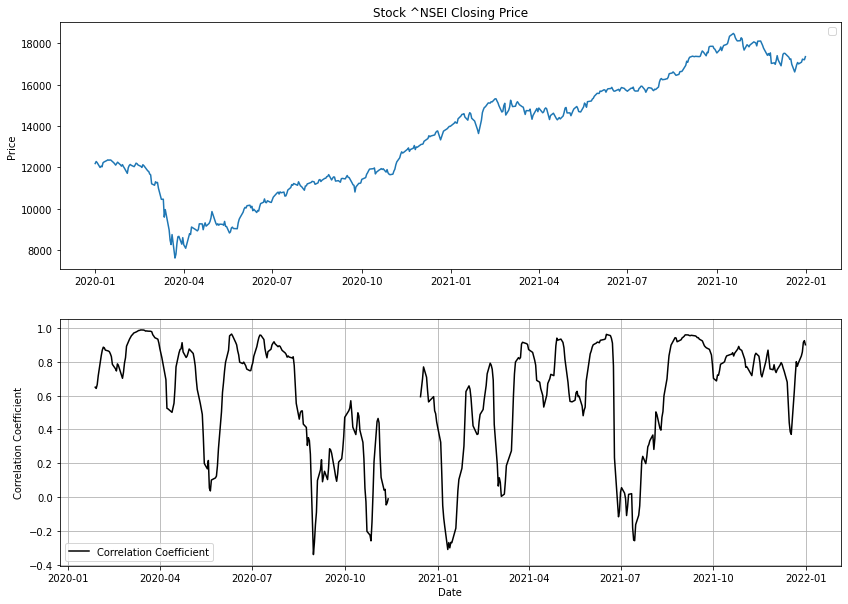

In [15]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Corr'], label='Correlation Coefficient', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Correlation Coefficient')
ax2.set_xlabel('Date')

## Candlestick with Correlation Coefficient

In [17]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,18261.770833,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,False
1,18262.770833,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,True
2,18263.770833,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,False
3,18266.770833,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,False
4,18267.770833,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,False


Text(0.5, 0, 'Date')

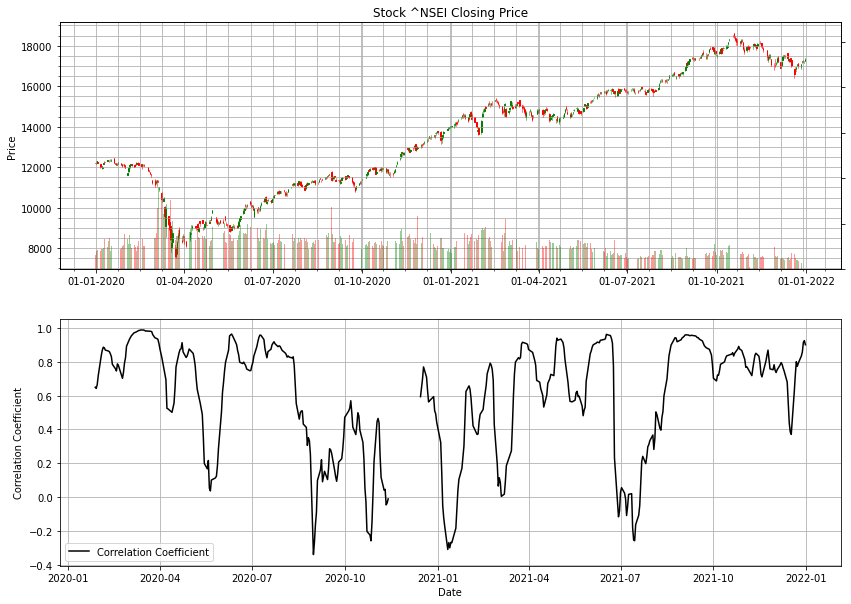

In [19]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Corr'], label='Correlation Coefficient', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Correlation Coefficient')
ax2.set_xlabel('Date')